# Scatter plot with error bars

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import ascii

In [3]:
# Read database
database=ascii.read('database.csv',format='csv',delimiter=',')

In [4]:
database

name,redshift,redshift sup,redshift inf,log M,log M sup,log M inf,SFR,SFR sup,SFR inf
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64
GRB050128,5.5,0.0,5.5,nan,nan,nan,nan,nan,nan
GRB050315,1.95,0.0,0.0,9.77,0.032796741581,0.032796741581,nan,nan,nan
GRB050318,1.4436,0.0,0.0,8.63,0.0,8.63,nan,nan,nan
GRB050319,3.2425,0.0,0.0,9.69,0.0485947525276,0.0485947525276,nan,nan,nan
GRB050401,2.8983,0.0,0.0,9.61,0.156993834917,0.156993834917,nan,nan,nan
GRB050525A,0.606,0.0,0.0,8.11,0.0,8.11,0.07,0.21,0.05
GRB050726,3.5,0.0,3.5,nan,nan,nan,nan,nan,nan
GRB050730,3.9693,0.0,0.0,9.46,0.0,9.46,nan,nan,nan
GRB050802,1.7102,0.0,0.0,9.0,0.109819265694,0.109819265694,nan,nan,nan


In [17]:
# Load SFR and Mass in Python arrays
x = database['log M']
y = database['SFR']

# Load uncertainties in Python arrays
xerrinf = database['log M inf']
xerrsup = database['log M sup']
yerrinf = database['SFR inf']
yerrsup = database['SFR sup']

# redshift
z = database['redshift']

# names
names = database['name']

# Calculate log SFR
y_log=np.log10(y)
yerr_log_inf=yerrinf/(y*np.log(10))
yerr_log_sup=yerrsup/(y*np.log(10))

<IPython.core.display.Javascript object>


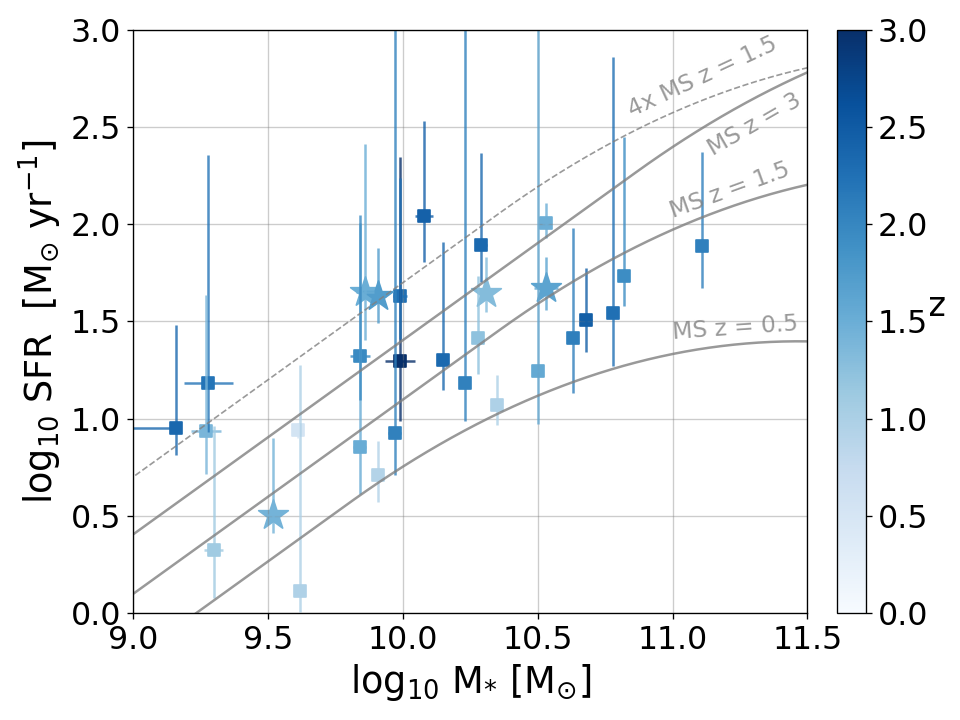

In [18]:
# Create new figure frame
plt.figure(figsize=(8,6))

# Scatter plot of SFR-Mass. Change symbol for specific objects
for i in range(len(x)):
    if names[i] in ['GRB061121','GRB080605','GRB080607','GRB080805','GRB100814A','GRB120119A']:
        marker='*'
        size=350
    else:
        marker='s'
        size=50
    plt.scatter(x[i],y_log[i],c=z[i],cmap=plt.cm.Blues,marker=marker,vmin=0,vmax=3,s=size)

    
# Nice way to get errorbar and colorbar
# Constrain the colorbar between 0 and 3
norm = matplotlib.colors.Normalize(vmin=0,vmax=3)
# choose a colormap
c_m = matplotlib.cm.Blues
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

# Create a mask to filter nan values
mask_real=(np.isfinite(y)==True) & (np.isfinite(x)==True)

#Plot errorbars for our candidates
plt.errorbar(x[mask_real],y_log[mask_real],xerr=[xerrinf[mask_real],xerrsup[mask_real]],
             yerr=[yerr_log_inf[mask_real],yerr_log_sup[mask_real]],color=s_m.to_rgba(z[mask_real]),
             fmt='o',ms=0,markeredgewidth=0,alpha=0.8)


# Add MS star forming galaxies 
M=np.logspace(7,11.5,100)
redshift=np.array([0.5,1.5,3])
m=np.log10(M/1e9)

m0=0.5
m1=0.36
a0=1.5
a1=0.3
a2=2.5

for zz in redshift:
    r=np.log10(1+zz)
    log10SFR=m-m0+a0*r-a1*(np.maximum(0,m-m1-a2*r))**2
    plt.plot(np.log10(M),log10SFR,color='grey',ls='-',alpha=0.8)
    if zz==1.5:plt.plot(np.log10(M),(log10SFR)+np.log10(4),color='grey',ls='--',lw=1,alpha=0.8)
   
# Locations to plot text
l1 = np.array((11., 1.41))
l2 = np.array((11., 2.03))
l3 = np.array((11.15, 2.35))
l4 = np.array((10.85, 2.55))
# Rotate angle
th = plt.text(l1[0], l1[1], 'MS z = 0.5', fontsize=14,rotation=4, rotation_mode='anchor',color='grey',alpha=0.8)
th = plt.text(l2[0], l2[1], 'MS z = 1.5', fontsize=14,rotation=20, rotation_mode='anchor',color='grey',alpha=0.8)
th = plt.text(l3[0], l3[1], 'MS z = 3', fontsize=14,rotation=30, rotation_mode='anchor',color='grey',alpha=0.8)
th = plt.text(l4[0], l4[1], '4x MS z = 1.5', fontsize=14,rotation=25, rotation_mode='anchor',color='grey',alpha=0.8)


# Set legend with only one point. Change legend size
#plt.legend(loc='lower right',numpoints=1,prop={'size':18})
# Create colorbar on the right side of figure
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=19)
cbar.ax.set_ylabel('z', rotation=180,size=20)
# Fix x and y axis limits
plt.xlim(9,11.5)
plt.ylim(0,3)
# Change label names size 
plt.tick_params(labelsize=19)
# Label names
plt.xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]',size=22)
plt.ylabel(r'log$_{10}$ SFR  [M$_{\odot}$ yr$^{-1}$]',size=22)
# Plot grid with main ticks only
plt.grid(True, which='major', color='grey', linestyle='-',alpha=0.4)
# Automatically adjusts plot so that the (sub)plot(s) fits in to the figure area
plt.tight_layout()
#plt.savefig('MS.png')

# Create movie from images

There are at least two libraries which can be used to stack images to create a movie: ffmpeg and Libav.  

fmpeg needs to be downloaded here https://ffmpeg.org/download.html  
Some documentation: https://ffmpeg.org/documentation.html

Libav is installed by default on Ubuntu, I do not know about other OS. You can download it here: https://libav.org/download/  
Documentation: https://libav.org/documentation/

In [ ]:
import os

In [ ]:
cd Images/

In [ ]:
# With ffmpeg
os.system("ffmpeg -f image2 -r 10  -s 1920x1080 -i image_%d.png -vcodec mpeg4 -b:v 1000k -y grb170817A_movie.mp4")

In [ ]:
# with avconv
# here we start at the image 8 with the command -start_number 8
os.system("avconv -r 10 -start_number 8 -i image_%d.png -b:v 1000k test_avconv.mp4")